In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras.backend as K
from keras.layers import Input, Dense, Subtract, Activation, Conv2D, MaxPooling2D, Flatten
from keras.models import Model
from keras.optimizers import Adam
from keras.objectives import binary_crossentropy
from keras.utils.vis_utils import plot_model
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
from itertools import permutations 

In [ ]:
# create training sample
patch_size = 64
train_patch = []
for i in range(25):
  sample = np.zeros((patch_size,patch_size,1))
  sample[patch_size//3:patch_size//2,patch_size//3:patch_size//2,:] = (i+1)*10
  train_patch.append(sample)

In [ ]:
# Get all permutations of length 2 
# and length 2 
perm = permutations(list(range(0,25)), 2) 
X_l = []
X_r = []
y = []
# Print the obtained permutations 
for i in list(perm):
    (l_index, r_index) = i
    X_l.append(train_patch[l_index])
    X_r.append(train_patch[r_index])
    if l_index>r_index:
      y.append(1)
    else:
      y.append(0)
X_l = np.stack(X_l)/255
X_r = np.stack(X_r)/255
y = np.array(y)

In [ ]:
random_index = np.random.permutation(range(0,len(y)))

In [ ]:
top_division = 10
train_X_l = X_l[random_index][:len(y)//top_division]
train_X_r = X_r[random_index][:len(y)//top_division]
train_y = y[random_index][:len(y)//top_division]

test_X_l = X_l[random_index][len(y)//top_division:]
test_X_r = X_r[random_index][len(y)//top_division:]
test_y = y[random_index][len(y)//top_division:]

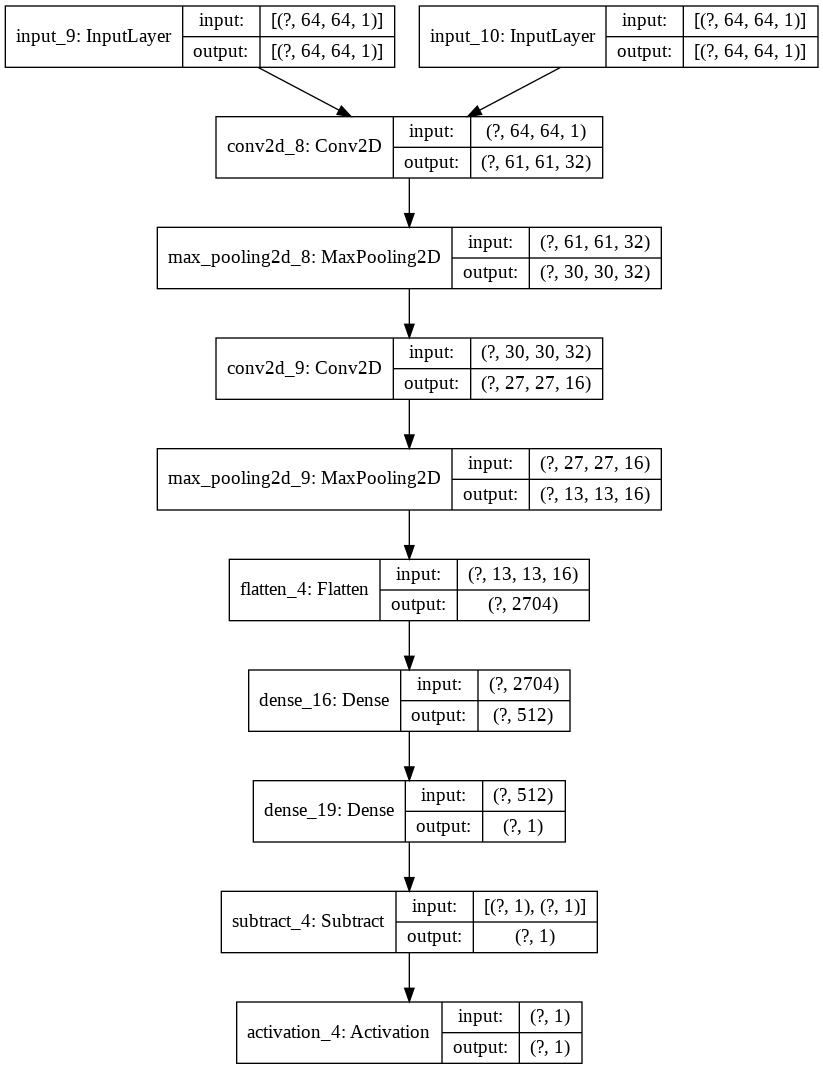

In [ ]:
H1 = Dense(512, activation="relu")
H2 = Dense(256, activation="relu")
H3 = Dense(128, activation="relu")
H4 = Dense(1)

conv1 = Conv2D(32, kernel_size=4, activation='relu')
pool1 = MaxPooling2D(pool_size=(2, 2))
conv2 = Conv2D(16, kernel_size=4, activation='relu')
pool2 = MaxPooling2D(pool_size=(2, 2))
flat = Flatten()

input_l = Input(shape=(patch_size,patch_size,1))
input_r = Input(shape=(patch_size,patch_size,1))

h1_l = conv1(input_l)
h2_l = pool1(h1_l)
h3_l = conv2(h2_l)
h4_l = pool2(h3_l)
h5_l = flat(h4_l)
h6_l = H1(h5_l)
h7_l = H4(h6_l)

h1_r = conv1(input_r)
h2_r = pool1(h1_r)
h3_r = conv2(h2_r)
h4_r = pool2(h3_r)
h5_r = flat(h4_r)
h6_r = H1(h5_r)
h7_r = H4(h6_r)

diff = Subtract()([h7_l, h7_r])
prob = Activation("sigmoid")(diff)
ranknet = Model(inputs=[input_l, input_r], outputs=prob)
optimizer = Adam()
ranknet.compile(optimizer = optimizer, loss='binary_crossentropy', metrics=['accuracy'])
plot_model(ranknet, show_shapes=True, show_layer_names=True)

In [ ]:
!nvidia-smi

Tue Nov  3 14:52:35 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   74C    P0    34W /  70W |   1125MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
history = ranknet.fit([train_X_l,train_X_r],train_y, batch_size = 32,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 38ms/step - loss: 0.6368 - accuracy: 1.0000
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 0.4667 - accuracy: 1.0000
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 0.2848 - accuracy: 1.0000
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 0.1408 - accuracy: 1.0000
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 0.0628 - accuracy: 1.0000
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 0.0311 - accuracy: 1.0000
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 0.0187 - accuracy: 1.0000
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 0.0102 - accuracy: 1.0000
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 0.0072 - accuracy: 1.0000
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 11/100
2/2 [==========

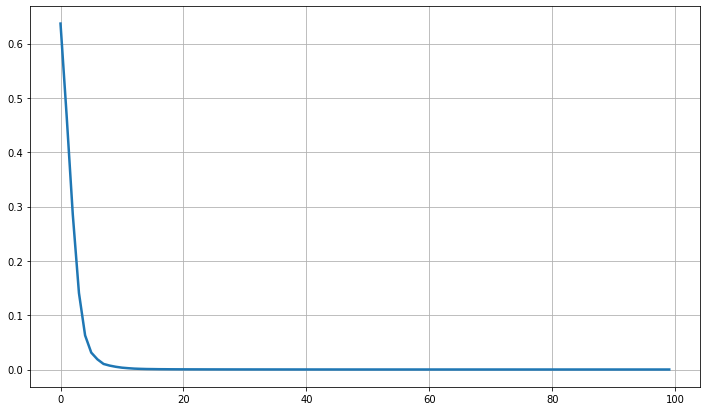

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(range(len(history.history.get("loss"))), history.history.get("loss"),linewidth = 2.5)
plt.grid(True)
plt.show()

In [ ]:
pred_y = ranknet.evaluate([test_X_l, test_X_r], test_y)

17/17 [==============================] - 0s 3ms/step - loss: 6.1662e-06 - accuracy: 1.0000


In [ ]:
pred_y[:10]

[6.166240837046644e-06, 1.0]

In [ ]:
test_y

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0])